In [27]:
import numpy as np

from modules.client import OffVarianceClient
import modules.utils as utils
from dotenv import dotenv_values

config = dotenv_values('../.env')

client = OffVarianceClient(config.get('OFF_VARIANCE_KEY'), data_path='../data')
games_df = client.get_finished_games()

games_df = utils.filter_correct_games(games_df)
utils.populate_metrics(games_df)

C:\Users\user\offvariance\notebooks\modules\utils.py:332: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['exp_g_total_zero'] = df['exp_g_H_zero'] + df['exp_g_A_zero']
C:\Users\user\offvariance\notebooks\modules\utils.py:333: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['exp_g_total_loc_zero'] = df['exp_g_H_loc_zero'] + df['exp_g_A_loc_zero']
C:\Users\user\offvariance\notebooks\modules\utils.py:334: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which ha

In [28]:
segmented_df = games_df.loc[
    (games_df['team1_home_classic_minutes'] >= 90 * 3) & (games_df['team2_away_classic_minutes'] >= 90 * 3) &
    (games_df['odds_open_win1'] >= 2.8) & (games_df['odds_open_win1'] <= 8) &
    (games_df['odds_open_tb25'] >= 2) & (games_df['odds_open_tb25'] <= 2.9)
    ]

In [29]:
segmented_df['simple_expected_total_value'].shape

(141,)

<AxesSubplot:xlabel='simple_expected_total_value', ylabel='total'>

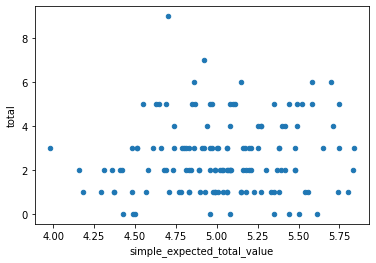

In [30]:
segmented_df.plot.scatter('simple_expected_total_value', 'total')

In [31]:
np.percentile(segmented_df['simple_expected_total_value'], 85)

5.44

In [32]:
segmented_df['simple_expected_total_value'].describe()

count    141.000000
mean       5.029929
std        0.385960
min        3.980000
25%        4.800000
50%        5.030000
75%        5.300000
max        5.840000
Name: simple_expected_total_value, dtype: float64

Count: 141
Open profit: -2.060000000000003
Close profit: -2.9899999999999984
Open ROI: -0.014609929078014207
Close ROI: -0.021205673758865236
UDI: -0.009994898964880228
AxesSubplot(0.125,0.125;0.775x0.755)


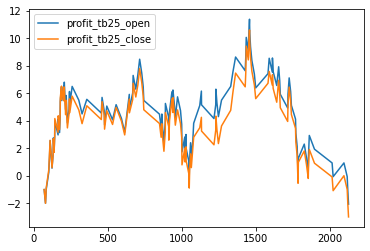

In [33]:
utils.print_total_over_result(segmented_df)

In [34]:
utils.analyze_correlation(segmented_df, 'total', utils.metrics)

,correlation
exp_g_03_H,0.257297
exp_g_03_H_zero,0.211803
exp_g_H,0.203491
exp_g_03_H_draw,0.202016
paper_03_H,0.200705
...,...
exp_g_diff_A_H_cop,0.002511
exp_g_diff_03_H_A_loc_draw,0.002005
exp_g_diff_03_A_H_loc_draw,-0.002005
exp_g_03_A_loc_com,-0.000712


In [35]:
utils.analyze_avg_udi(segmented_df, utils.metrics, 'udi_tb25')

,low,high,diff
exp_g_total_loc_cop,3.750848,2.287345,1.463503
exp_g_A_loc_cop,2.676187,1.239960,1.436227
exp_g_diff_H_A_loc_cop,-1.601526,-0.192575,1.408951
exp_g_diff_A_H_loc_cop,1.601526,0.192575,1.408951
exp_g_diff_03_H_A_loc_cop,-1.548513,-0.208555,1.339958
...,...,...,...
exp_g_diff_A_H_zero,0.407278,0.400140,0.007138
exp_diff_A_H,0.489601,0.491085,0.001484
exp_diff_H_A,-0.489601,-0.491085,0.001484
exp_g_diff_H_A_loc_zero,-0.374267,-0.375210,0.000943


In [36]:
updated_segmented_df = segmented_df.loc[
(segmented_df['exp_g_03_H'] >= 0.77) & (segmented_df['paper_03_H'] >= 0.78)
]

utils.analyze_avg_udi(updated_segmented_df, [
    'exp_g_03_H',
    'paper_03_H',
], 'udi_tb25')

,low,high,diff
paper_03_H,0.835678,0.911736,0.076058
exp_g_03_H,0.994383,1.029467,0.035083


In [37]:
updated_segmented_df['exp_g_03_H'].describe()

count    14.000000
mean      1.022000
std       0.124952
min       0.800000
25%       0.932200
50%       1.014600
75%       1.072350
max       1.251900
Name: exp_g_03_H, dtype: float64

<AxesSubplot:>

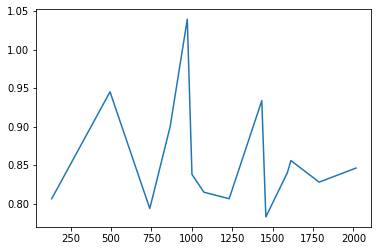

In [38]:
updated_segmented_df['paper_03_H'].plot()

Count: 3
Open profit: 3.87
Close profit: 3.4999999999999996
Open ROI: 1.29
Close ROI: 1.1666666666666665
UDI: 0.0577547973802743
AxesSubplot(0.125,0.125;0.775x0.755)


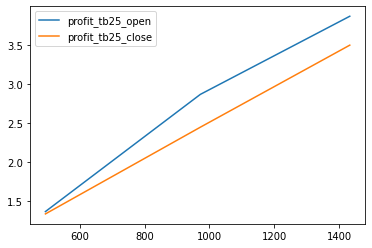

In [39]:
filtered_result_df = segmented_df.loc[
    (segmented_df['exp_g_03_H'] >= 1.02) & (segmented_df['paper_03_H'] >= 0.91)
    ]
utils.print_total_over_result(filtered_result_df)